# load dataset


In [32]:
import os
import sys
import pandas as pd
sys.path.append(os.path.dirname(os.path.abspath('..')))

In [33]:
from model.utils.data_preparation import load_orig_data

train_dataset, test_dataset = load_orig_data(data_dir='../../data')

desire = 'Eat'

train_dataset = train_dataset[train_dataset['travel_purpose'] == desire]
test_dataset = test_dataset[test_dataset['travel_purpose'] == desire]

train_dataset['target_amenity'] = train_dataset['top_amenity'] + \
    '/' + train_dataset['sub_amenity']
test_dataset['target_amenity'] = test_dataset['top_amenity'] + \
    '/' + test_dataset['sub_amenity']


income_bins = [-float('inf'), 0, 30000, 60000, 90000, 120000, float('inf')]
income_labels = ['Debt', 'Low', 'Moderate', 'High', 'Very High', 'Ultra High']
age_bins = [-float('inf'), 18, 30, 40, 50, 60, float('inf')]
age_labels = ['Teen', 'Young Adult', 'Adult',
              'Middle Age', 'Senior', 'Elderly']

train_dataset['income_group'] = pd.cut(
    train_dataset['individual_income'], bins=income_bins, labels=income_labels)
train_dataset['age_group'] = pd.cut(
    train_dataset['age'], bins=age_bins, labels=age_labels)
test_dataset['income_group'] = pd.cut(
    test_dataset['individual_income'], bins=income_bins, labels=income_labels)
test_dataset['age_group'] = pd.cut(
    test_dataset['age'], bins=age_bins, labels=age_labels)

train_dataset['target_mode'] = train_dataset['mode']
test_dataset['target_mode'] = test_dataset['mode']

In [34]:
train_dataset = train_dataset[['person_id', 'age', 'age_group', 'individual_income',
                               'income_group', 'household_size', 'family_structure', 'vehicles', 'target_amenity', 'target_mode']]
test_dataset = test_dataset[['person_id', 'age', 'age_group', 'individual_income',
                             'income_group', 'household_size', 'family_structure', 'vehicles', 'target_amenity', 'target_mode']]
train_dataset.head(2)

,person_id,age,age_group,individual_income,income_group,household_size,family_structure,vehicles,target_amenity,target_mode
3,1.156380e+19,75,Elderly,20629,Low,1_person,living_alone,1,F&B Eatery/Full-Service Restaurants,Car
12,8.563215e+18,22,Young Adult,0,Debt,2_person,family_single,0,F&B Eatery/Full-Service Restaurants,Walking


In [35]:
train_dataset.to_csv(f'train/{desire}.csv', index=False)
test_dataset.to_csv(f'test/{desire}.csv', index=False)

In [7]:
desire = 'Eat'
train_dataset = pd.read_csv(f'train/{desire}.csv')
test_dataset = pd.read_csv(f'test/{desire}.csv')
test_dataset = test_dataset[:200]

In [8]:
len(test_dataset)

200

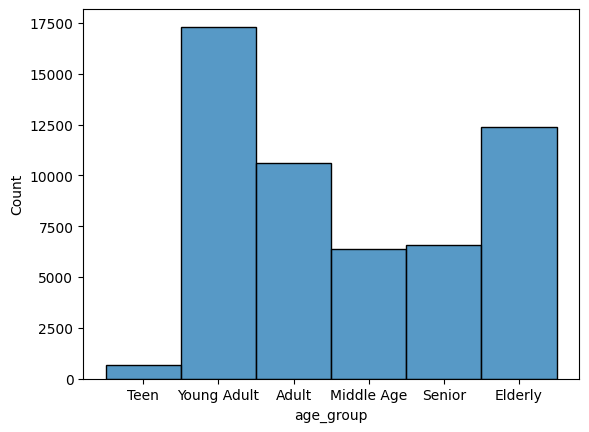

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

ages = ['Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior', 'Elderly']
train_dataset['age_group'] = pd.Categorical(
    train_dataset['age_group'], categories=ages, ordered=True)
sns.histplot(data=train_dataset, x='age_group')
# plt.xticks(range(6), ages, rotation=0)
plt.show()

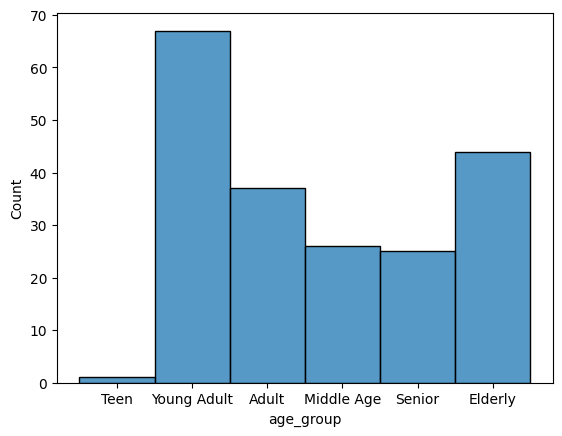

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
test_dataset['age_group'] = pd.Categorical(
    test_dataset['age_group'], categories=ages, ordered=True)
sns.histplot(data=test_dataset, x='age_group')
# plt.xticks(range(6), ages, rotation=0)
plt.show()

In [27]:
household_mapping = {'1_person': 1, '2_person': 2, '3_person': 3,
                     '4_person': 4, '5_person': 5, '6_person': 6, '7_plus_person': 7}
vechiles_mapping = {'0': 0, '1': 1, '2': 2, '3_plus': 3}
family_mapping = {'living_alone': 0, 'nonfamily_single': 1,
                  'family_single': 2, 'married_couple': 3}
mode_mapping = {'Walking': 0, 'Public_transport': 1, 'Car': 2}
codes, uniques = pd.factorize(train_dataset['target_amenity'])
amenity_mapping = {category: code for code, category in enumerate(uniques)}

income_mapping = {'Debt': 0, 'Low': 1, 'Moderate': 2,
                  'High': 3, 'Very High': 4, 'Ultra High': 5}
age_mapping = {'Teen': 0, 'Young Adult': 1, 'Adult': 2,
               'Middle Age': 3, 'Senior': 4, 'Elderly': 5}

In [29]:
train_data = train_dataset.copy()
train_data['household_size'] = train_data['household_size'].map(
    household_mapping)
train_data['vehicles'] = train_data['vehicles'].map(vechiles_mapping)
train_data['family_structure'] = train_data['family_structure'].map(
    family_mapping)
train_data['target_mode'] = train_data['target_mode'].map(mode_mapping)
train_data['target_amenity'] = train_data['target_amenity'].map(
    amenity_mapping)
train_data['age_group'] = train_data['age_group'].map(age_mapping)
train_data['income_group'] = train_data['income_group'].map(income_mapping)
train_data = train_data.drop(columns=['individual_income', 'age'])
train_data.head(2)

,person_id,age_group,income_group,household_size,family_structure,vehicles,target_amenity,target_mode
0,1.156380e+19,5,1,1,0,1,0,2
1,8.563215e+18,1,0,2,2,0,0,0


In [30]:
test_data = test_dataset.copy()
test_data['household_size'] = test_data['household_size'].map(
    household_mapping)
test_data['vehicles'] = test_data['vehicles'].map(vechiles_mapping)
test_data['family_structure'] = test_data['family_structure'].map(
    family_mapping)
test_data['target_mode'] = test_data['target_mode'].map(mode_mapping)
test_data['target_amenity'] = test_data['target_amenity'].map(amenity_mapping)
test_data['age_group'] = test_data['age_group'].map(age_mapping)
test_data['income_group'] = test_data['income_group'].map(income_mapping)
test_data = test_data.drop(columns=['individual_income', 'age'])
test_data.head(2)

,person_id,age_group,income_group,household_size,family_structure,vehicles,target_amenity,target_mode
0,5.570035e+18,1,2,3,2,1,2,0
1,7.600486e+18,1,0,3,1,0,1,0


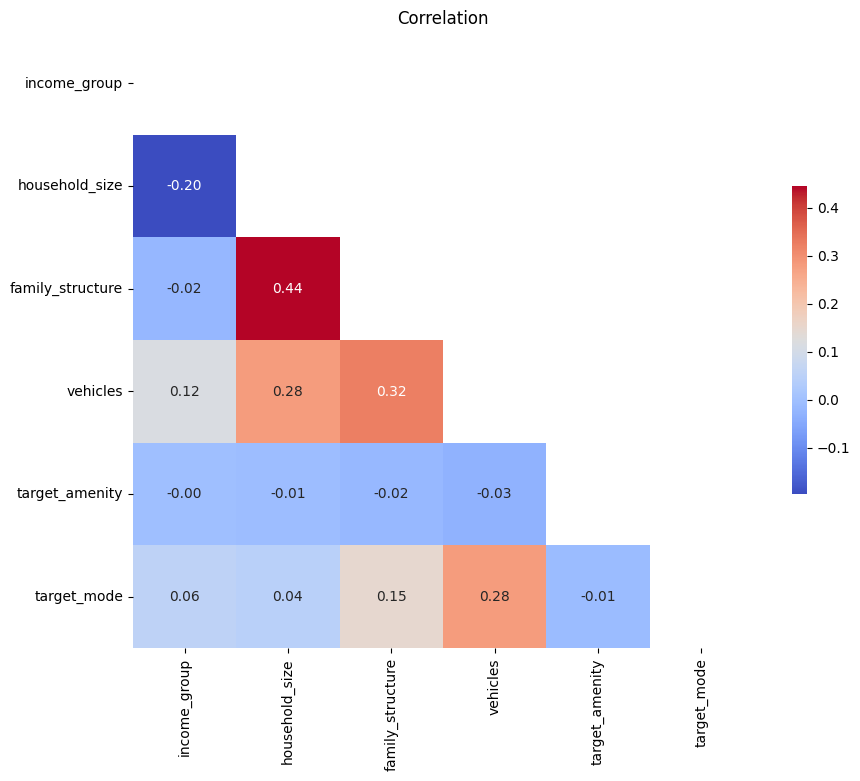

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr_matrix = train_data.drop(['person_id'], axis=1).corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# mask = None

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix,  mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .5})

plt.title('Correlation')
plt.show()